<a href="https://colab.research.google.com/github/jaosunitagithub/TFM/blob/master/Sampleo_gausiano_pag99_MC_Chiachio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simulacion Monte Carlo - Variable aleatoria continua x de 2 dimensiones (x1,x2)**
# **Pag 99 CHIACHIO**

---



- Función de estado límite: g(x) = g(x1,x2) = 4/25*(x1-1)^2 + x2 - 4

- Sampleo usando: distribución continua gaussiana multivariable de 2 dimensiones

### **Importación de librerías**

In [0]:
#%% Importación de librerías

import sys
assert sys.version_info >= (3, 5)   # Python ≥ 3.5 es necesario

import numpy as np
import math
import scipy as sp
from scipy import linalg as sp_linalg
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d          # Graficas 3d
from timeit import default_timer

### **Cálculos**

In [2]:
#%% Inicio

t_ini = default_timer()

print("-"*70, "\nSimulación MonteCarlo de 2 dimensiones. Pag 99 CHIACHIO.")
print("-"*70)
print("Función de estado límite : g(x1,x2) = 4/25*(x1-1)^2 + x2 - 4")

ns = 10000              # Numero de sampleos (simulaciones)
mu = np.zeros((1,2))    # Vector fila (1x2), con valores medios x1 y x2 que son cero
d = mu.shape[1]
sigma = np.array([[  1,  0.4],     # Matriz covarianzas de x1 y x2, simetrica, (dxd))
                  [0.4,  1  ]])

#%% Cálculos

A = sp_linalg.cholesky(sigma, lower=True)  # (dxd) Factoriz Cholesky de una matriz simetrica. Obtiene matriz triang. inferior
#A = np.linalg.cholesky(sigma)    # (dxd) Factoriz Cholesky de una matriz simetrica. Obtiene matriz triang. inferior
print("Matriz triangular inferior factorizacion Cholesky: \n", A)
sumando1 = np.tile(mu, (ns, 1))  # Matriz ns x d. Repeticion "ns" copias del vector "mu" (1xd)
sumando2 = np.random.uniform(0, 1, (ns,d) ) @ A  # % Matriz con numeros aleatorios uniform. distribuidos en intervalo (0,1). (nsxd) x (dxd) = (nsxd)
sampleo = sumando1 + sumando2    # (nsxd) Simula la variable de estado

vector_gx = 4/25*((sampleo[:,0]-1)**2) + sampleo[:,1] - 4  # (nsxd) Evalúa la función de estado límite g(x1,x2) = 4/25*(x1-1)^2 + x2 - 4
# Si g(x) >  0, el punto se encuentra en la región de fallo
# Si g(x) <= 0, el punto se encuentra en la región de seguridad
vector_nf = np.array(vector_gx > 0)       # Vector booleano que es uno si se cumple que g(x) > 0
indices_nf = np.argwhere(vector_gx > 0)   # Obtiene índices elementos que cumplen la condición dada
nf = len(indices_nf)                      # Contador de numero de fallos
PoF = nf / ns                             # Probabilidad de fallo 
Fiabilidad = 1-PoF
print("Número de sampleos (realizaciones): {0} sampleos ({1} fuera y {2} dentro).".format(ns, nf, ns-nf))
print(f'Probabilidad de fallo:{PoF:10.5f}   ==>   Fiabilidad:{Fiabilidad:10.5f}')

---------------------------------------------------------------------- 
Simulación MonteCarlo de 2 dimensiones. Pag 99 CHIACHIO.
----------------------------------------------------------------------
Función de estado límite : g(x1,x2) = 4/25*(x1-1)^2 + x2 - 4
Matriz triangular inferior factorizacion Cholesky: 
 [[1.         0.        ]
 [0.4        0.91651514]]
Número de sampleos (realizaciones): 10000 sampleos (0 fuera y 10000 dentro).
Probabilidad de fallo:   0.00000   ==>   Fiabilidad:   1.00000


### **Función que representa las gráficas**

<Figure size 432x288 with 0 Axes>

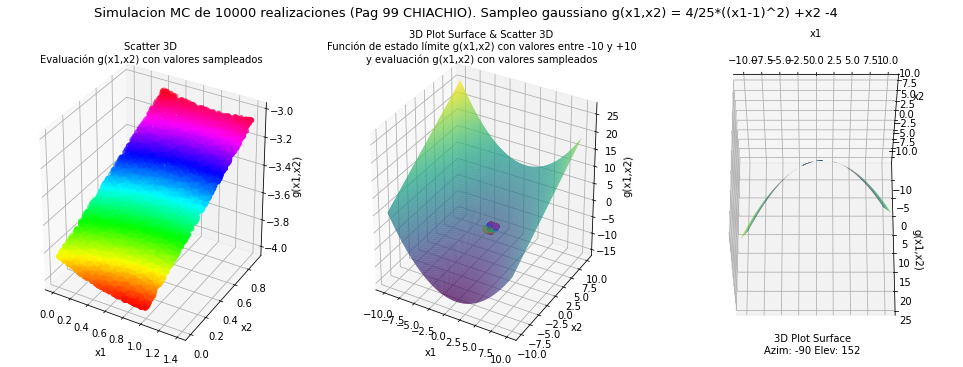

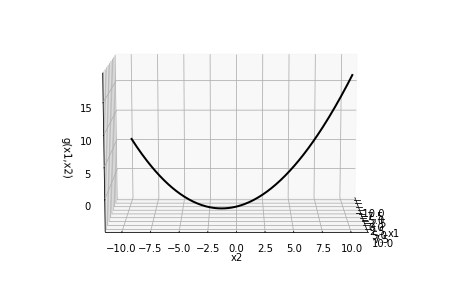

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Tiempo de ejecución: 19.49099 segundos.


In [3]:
#%% Gráficas de resultados

# Parametrizacion para graficar función de estado límite de x1,x2 entre [-10, 10]
x1 = np.linspace(-10,10,200)   # 200 valores espaciados
x2 = np.linspace(-10,10,200)   # 200 valores espaciados
y = 4/25*((x1-1)**2) + x2 - 4  # Funcion de estado límite
X1, X2 = np.meshgrid(x1, x2)
Y = 4/25*((X1-1)**2) + X2 - 4

# Representacion de tres gráficas subplots
plt.clf()   # Clear figure
fig = plt.figure(figsize=(17, 5))                 # create a figure object
ax1 = fig.add_subplot(1, 3, 1, projection='3d')   # create an axes object in the figure
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')

# Subplot 1. Scatter3D.
ax1.scatter3D(sampleo[:,0], sampleo[:,1], vector_gx, c=vector_gx, cmap='hsv')
ax1.set_title('Scatter 3D\nEvaluación g(x1,x2) con valores sampleados', fontsize=10)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('g(x1,x2)')
#fig.colorbar(surf, shrink=0.5, aspect=5)  # Add a color bar which maps values to colors.

# Subplot 2. 3D Plot Surface y Scatter 3D.
surf = ax2.plot_surface(X1, X2, Y, rstride=1, cstride=1,cmap='viridis', edgecolor='none')  #cmap='winter', 'autumn', 'hsv'
ax2.set_title('3D Plot Surface & Scatter 3D\nFunción de estado límite g(x1,x2) con valores entre -10 y +10\ny evaluación g(x1,x2) con valores sampleados', fontsize=10)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('g(x1,x2)')
ax2.scatter3D(sampleo[:,0], sampleo[:,1], vector_gx, c=vector_gx, cmap='hsv')
# ax2.plot3D(x1, x2, y, 'black', lw=2, ls='--')   # Línea 3d

# Subplot 3. 3D Plot Surface. 
#ax3.contour3D(X1, X2, Y, 50, cmap='binary')
ax3.plot_surface(X1, X2, Y, rstride=1, cstride=1,cmap='viridis', edgecolor='none')  
ax3.set_xlabel('x1',fontsize=10)
ax3.set_ylabel('x2')
ax3.set_zlabel('g(x1,x2)')
ax3.azim = -90  # azim = azimuth rotated degres counter-clockwise about z-axis
ax3.elev = 152  # elev = elevation above x-y plane
ax3.set_title('3D Plot Surface\nAzim: ' + str(ax3.azim) + " Elev: " + str(ax3.elev), fontsize=10, y=0)
# ax3.set_xlim3d(-10, 10)
# ax3.set_ylim3d(-10, 10)
# ax3.set_zlim3d(-15, 27)
#ax3.set_title('3D Contour plot', fontsize=10, horizontalalignment='center', verticalalignment='bottom', pad=20)

# Configuracion de las tres gráficas subplots
plt.subplots_adjust(top = 0.88, bottom=0, wspace=0.15, hspace = 0)  # Espaciado entre subplots, y respecto marco superior bottom=0.1 wspace=0.05, hspace = 0.1,   
plt.suptitle('Simulacion MC de ' + str(ns) + ' realizaciones (Pag 99 CHIACHIO). Sampleo gaussiano g(x1,x2) = 4/25*((x1-1)^2) +x2 -4', fontsize=13)
fig.savefig('Simulacion_MonteCarlo_99.png', bbox_inches = 'tight') 
plt.show()

# Grafica adicional dinámica en el tiempo. Para visualizar el movimiento es necesario modificar opciones
# en Spyder: Preferencias -> Terminal de Iphyton -> Gráficas -> Salida gráfica -> Salida: "Automático" (en lugar de "en línea")
# Y abrir una nueva terminal de Ipython.
fig4 = plt.figure(figsize=(8, 5))
ax4 = plt.axes(projection='3d')
ax4.plot3D(x1, x2, y, 'black', lw=2, ls='-')   # Línea 3d
# ax4.scatter3D(sampleo[:,0], sampleo[:,1], vector_gx, c=vector_gx, cmap='autumn')
# ax4.set_title('Sampleo y evaluación de g(x1,x2) = 4/25*((x1-1)^2) +x2 -4')
ax4.set_xlabel('x1')
ax4.set_ylabel('x2')
ax4.set_zlabel('g(x1,x2)')
for angulo in range(0,360,30):
    ax4.view_init(elev=10., azim=angulo)  
    plt.draw()   # fig4.canvas.draw()
    #fig4.savefig("movie%d.png" % ii)
    plt.pause(.5)

t_fin = default_timer()
print(f"Tiempo de ejecución: {t_fin-t_ini:.5f} segundos.")    